In [9]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

rcParams["figure.dpi"] = 300
rcParams["text.usetex"] = True

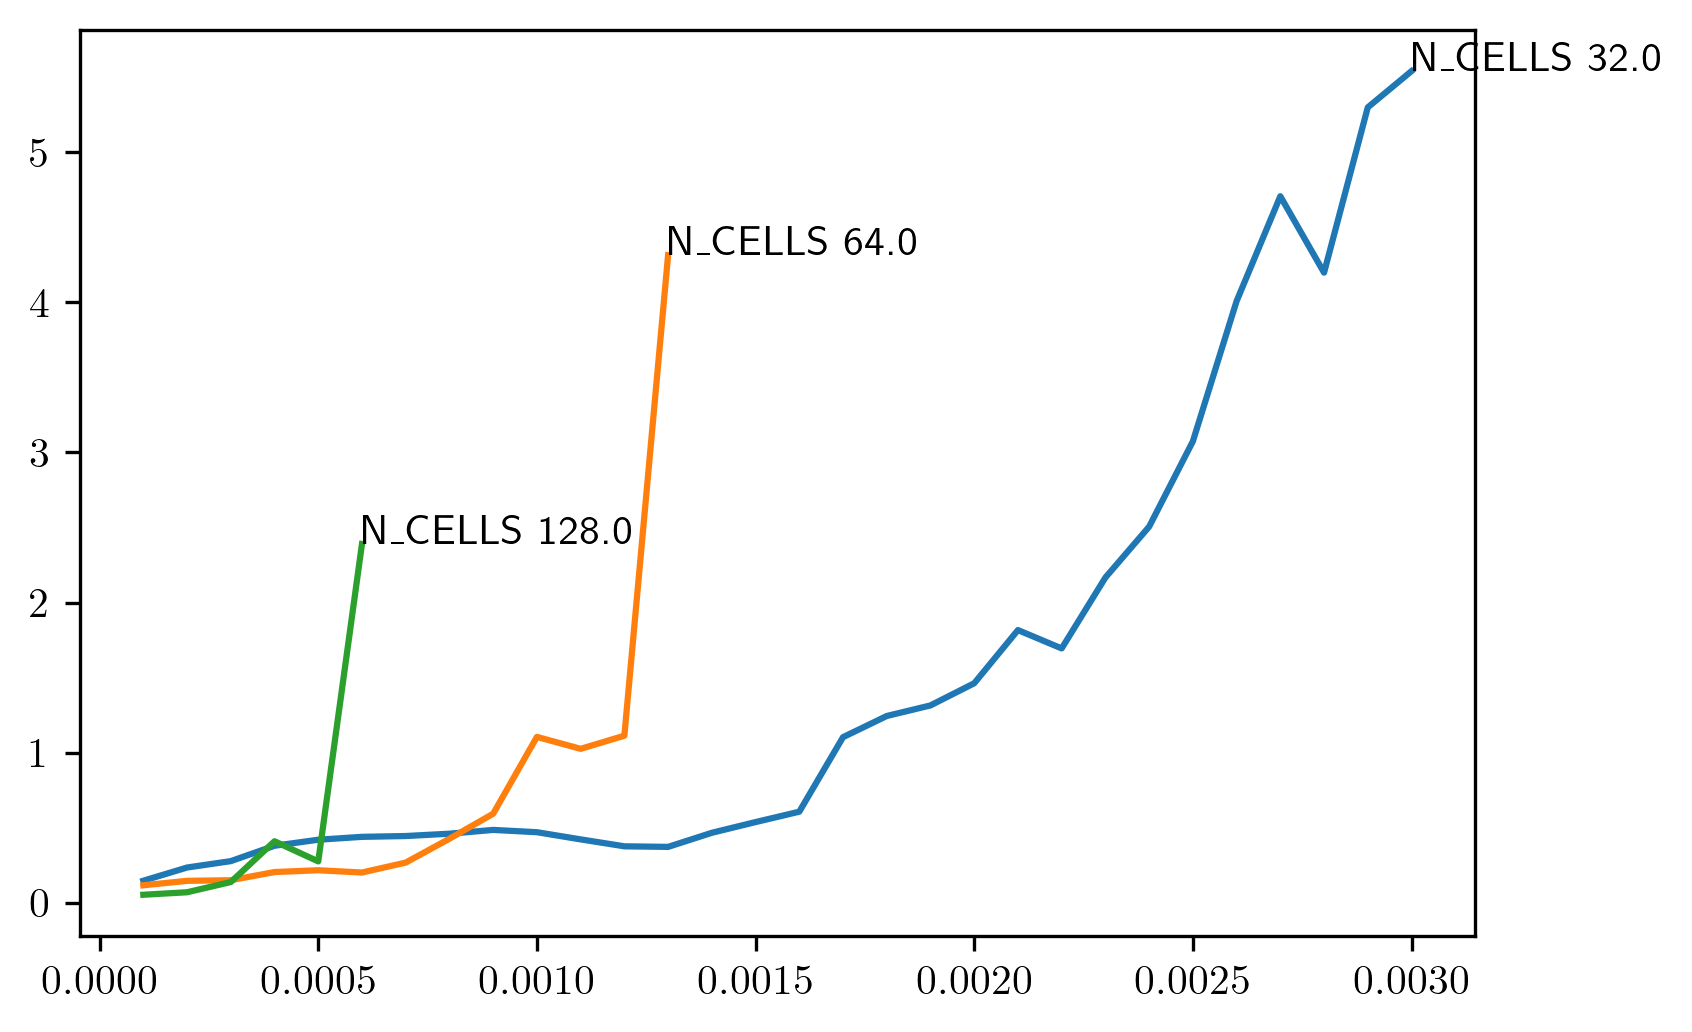

In [17]:
dframe = pd.read_json("divNormal.json", orient='table')

idx = pd.IndexSlice


n_cells_list = dframe.index.get_level_values("N_CELLS").unique()

for n_cells in n_cells_list:
    dframe_slice = dframe.loc[idx[:, :, :, :, :, :,  n_cells,  :]]
    plt.plot(dframe_slice["Time"], dframe_slice["max"])
    label_x = dframe_slice["Time"].iloc[-1]
    label_y = dframe_slice["max"].iloc[-1]
    plt.annotate("N\_CELLS %s" % n_cells, (label_x,label_y))